In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#uci 
#This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades,
#demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are 
#provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008],
#the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a
#strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 
#correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful 
df1 = pd.read_csv('student_por.csv', delimiter=';')

#kaggle
#The data was collected from the Faculty of Engineering and Faculty of Educational Sciences students in 2019. The purpose is to predict
#students' end-of-term performances using ML techniques.
df2 = pd.read_csv('student_prediction.csv')

In [101]:
# Data Cleaning
# Check for missing values
print(df1.isnull().values.any())
print(df2.isnull().values.any())

False
False


In [102]:
# Display Dataset 1
display(df1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [103]:
# Display Dataset # 2
display(df2)

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [104]:
# Data Preprocessing

# Column Renaming

# Rename columns in df2 for consistency (including 'GRADE' to 'final_grade')
df2.rename(columns={
    'GENDER': 'sex',
    'AGE': 'age',
    'MOTHER_EDU': 'Medu',
    'FATHER_EDU': 'Fedu',
    'MOTHER_JOB': 'Mjob',
    'FATHER_JOB': 'Fjob',
    'STUDY_HRS': 'studytime',
    'ACTIVITY': 'activities',
    'PARTNER': 'romantic',
    'ATTEND': 'attendance',
    'KIDS': 'Pstatus',
    'CUML_GPA': 'gpa',
    'GRADE': 'final_grade'  # Rename 'GRADE' here
}, inplace=True)



In [105]:
# Categorical Encoding and Categorization

# Encode 'sex' column in df1 (1: Female, 2: Male) - Categorical Encoding
sex_mapping = {'F': 1, 'M': 2}
df1['sex'] = df1['sex'].replace(sex_mapping)

In [106]:
# Categorize 'age' column in df1 into groups (0: ages 15-17, 1: ages 18-21, 2: age 22) - Categorization
age_mapping = {15: 0, 16: 0, 17: 0, 18: 1, 19: 1, 20: 1, 21: 1, 22: 2}
df1['age'] = df1['age'].replace(age_mapping)

In [107]:
# Encode 'Pstatus' column in df1 (1: married, 2: divorced) - Categorical Encoding
cohab_mapping = {'T': 1, 'A': 2}  # T: married, A: divorced
df1['Pstatus'] = df1['Pstatus'].replace(cohab_mapping)

In [108]:
# Encode 'activities' and 'romantic' columns in df1 (1: yes, 2: no) - Categorical Encoding
activity_mapping = {'yes': 1, 'no': 2}
df1['activities'] = df1['activities'].replace(activity_mapping)
df1['romantic'] = df1['romantic'].replace(activity_mapping)


In [109]:
# Encode 'Mjob' and 'Fjob' columns in df1 using predefined numerical mappings - Categorical Encoding
job_mapping = {
    'teacher': 3,
    'health': 2,
    'services': 3,
    'at_home': 2,
    'other': 6
}
df1['Mjob'] = df1['Mjob'].replace(job_mapping)  # Encode mother's job
df1['Fjob'] = df1['Fjob'].replace(job_mapping)  # Encode father's job


In [110]:
# Categorize 'absences' into 'attendance' in df1
def categorize_absences(absences):
    if absences == 0:
        return 1  # Always attends
    elif 1 <= absences <= 10:
        return 2  # Sometimes absent
    else:
        return 3  # Frequently absent

df1['attendance'] = df1['absences'].apply(categorize_absences)

In [111]:
# Calculate 'average_grade' from 'G1' and 'G2' in df1
df1['average_grade'] = df1[['G1', 'G2']].mean(axis=1)

# Define grade bins and labels
grade_bins = [-1, 5.99, 10.99, 13.99, 16.99, 20]
grade_labels = [1, 2, 3, 4, 5]

# Categorize 'average_grade' into 'gpa' in df1
df1['gpa'] = pd.cut(df1['average_grade'], bins=grade_bins, labels=grade_labels)

# Convert 'G3' into 'final_grade' in df1
df1['final_grade'] = pd.cut(df1['G3'], bins=grade_bins, labels=grade_labels)

In [112]:
# Processing 'final_grade' in df2

# Map 'final_grade' from 0-7 to 0-20 in df2
df2['numeric_grade'] = (df2['final_grade'] / 7) * 20

### Apply the same binning to 'numeric_grade' to get the new 'final_grade'
df2['final_grade'] = pd.cut(df2['numeric_grade'], bins=grade_bins, labels=grade_labels)

### Drop 'numeric_grade' as it's no longer needed
df2.drop(columns=['numeric_grade'], inplace=True)

In [113]:
## Standardization

### Ensure data types are consistent between df1 and df2
columns_to_convert = ['age', 'sex', 'Medu', 'Fedu', 'activities', 'final_grade']
for col in columns_to_convert:
    df1[col] = df1[col].astype(int)
    df2[col] = df2[col].astype(int)

In [114]:
## Data Merging

### Select columns to keep
columns_to_keep = ['sex', 'age', 'Medu', 'Fedu', 'Mjob', 'Fjob',
                   'studytime', 'activities', 'romantic',
                   'attendance', 'Pstatus', 'gpa', 'final_grade']

### Merge df1 and df2
merged_df = pd.concat([df1[columns_to_keep], df2[columns_to_keep]], ignore_index=True)

In [115]:
# Display the merged DataFrame
display(merged_df)

,sex,age,Medu,Fedu,Mjob,Fjob,studytime,activities,romantic,attendance,Pstatus,gpa,final_grade
0,1,1,4,4,2,3,2,2,2,2,2,1,3
1,1,0,1,1,2,6,2,2,2,2,1,2,3
2,1,0,1,1,2,6,2,2,2,2,1,3,3
3,1,0,4,2,2,3,3,1,1,1,1,4,4
4,1,0,3,3,6,6,2,2,2,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1,2,1,2,2,4,3,1,2,1,2,3,4
790,1,1,1,1,2,1,3,2,2,2,1,5,4
791,1,1,3,4,2,4,2,2,2,1,1,4,1
792,1,2,4,4,3,3,2,1,1,1,1,5,3


/var/folders/bj/hvx0tsh15fd0h0980bgq9_zc0000gp/T/ipykernel_33255/291460302.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='final_grade', palette="viridis")


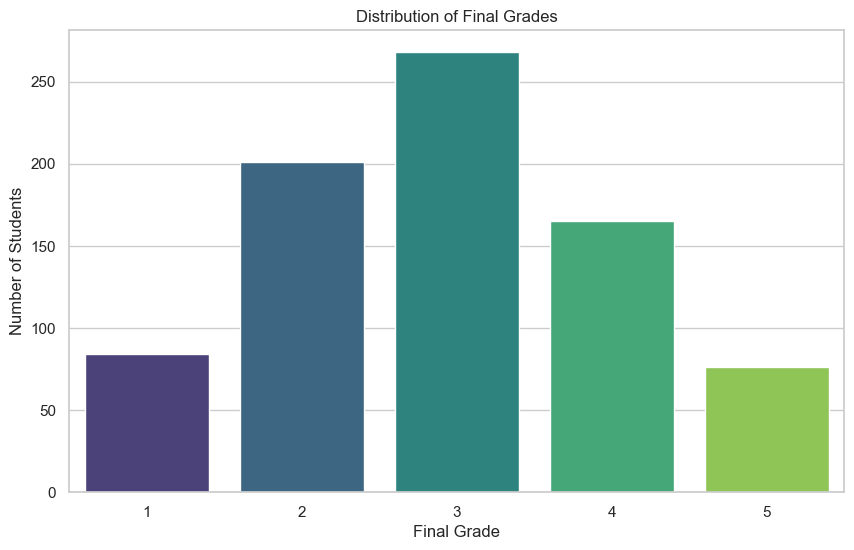

/var/folders/bj/hvx0tsh15fd0h0980bgq9_zc0000gp/T/ipykernel_33255/291460302.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=attendance_by_sex, x='sex', y='attendance', palette='pastel')


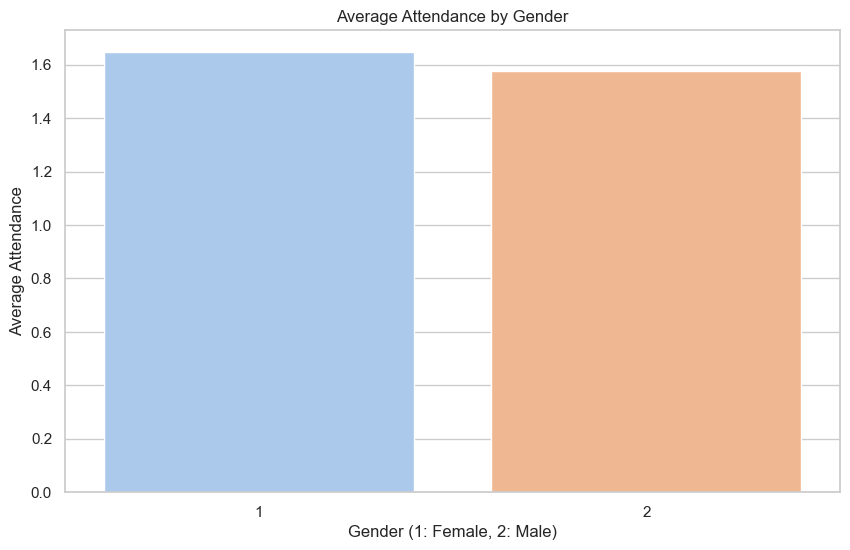

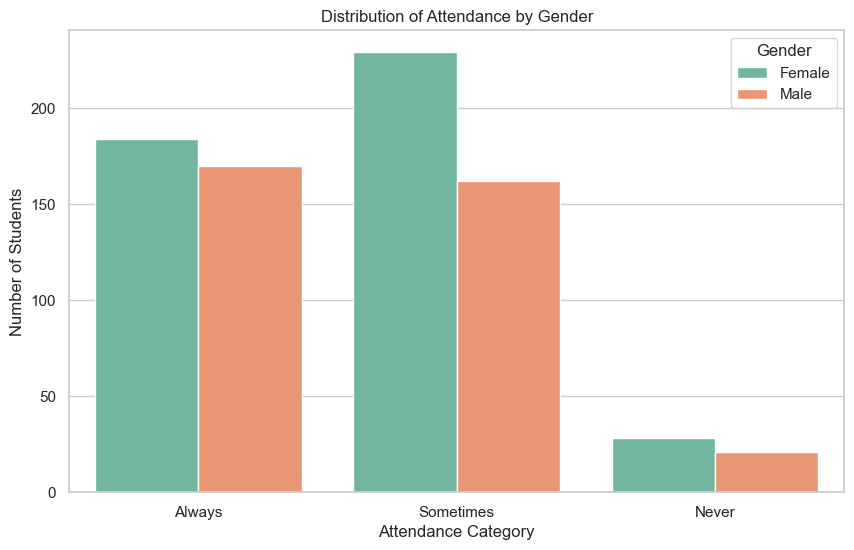

In [116]:
sns.set(style="whitegrid")

# Plot distribution of final grades
plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, x='final_grade', palette="viridis")
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.show()

# Calculate average attendance by gender
attendance_by_sex = merged_df.groupby('sex')['attendance'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=attendance_by_sex, x='sex', y='attendance', palette='pastel')
plt.title('Average Attendance by Gender')
plt.xlabel('Gender (1: Female, 2: Male)')
plt.ylabel('Average Attendance')
plt.xticks(rotation=0)
plt.show()


# Create a count plot for attendance by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='attendance', hue='sex', palette='Set2')

# Customize the plot
plt.title('Distribution of Attendance by Gender')
plt.xlabel('Attendance Category')
plt.ylabel('Number of Students')
plt.xticks(ticks=[0, 1, 2], labels=['Always', 'Sometimes', 'Never'], rotation=0)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()
